In [ ]:
import sys
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze

# The Recursive Backtracer algorithm
## How does it work?
The recursive backtracer algorithm is a fairly simple algorithm. We randomly choose a node and call it the current node. Then we look for a node adjacent to our node that hasn't been visited and we travel to it. We now update the current node to the newly opened node. When we are in a situation where further traversal isn't possible, we backtrack to previous cells until we find a cell that has neighbors that haven't been visited and randomly choose one of them.  
Another explanation (slightly more technical) for the algorithm is that we simulate an entity making random walks in a grid, and when the entity can no longer go forward we backtrack until we find an opportunity to make our path bigger.
## Is every node connected?
Yes every node is connected. We are assured of their connectedness because each node is visited once, and a path is carved to it from an already visited node. Therefore we can conclude that every node will be connected to every other node.

In [ ]:
def RecursiveBacktracer(maze):
    # Creating a visited array to check if the node has been visited or not
    # O represents unvisited and 1 represents visited
    vis = []
    for i in range(0, maze.num_rows):
        vis.append(list(bytearray(maze.num_columns)))
    # The stack for the recursive backtracer algorithm
    stack = []
    stack.append((random.randint(0, maze.num_rows-1), random.randint(0, maze.num_columns-1)))
    # Repeat the algorithm till all nodes are explored
    while len(stack):
        directions = []
        x, y = stack[-1]
        vis[x][y] = 1
        if x > 0 and vis[x-1][y] == 0:
            directions.append('N')
        if y > 0 and vis[x][y-1] == 0:
            directions.append('W')
        if x < maze.num_rows-1 and vis[x+1][y] == 0:
            directions.append('S')
        if y < maze.num_columns-1 and vis[x][y+1] == 0:
            directions.append('E')
        if len(directions) == 0:
            stack.pop()
            continue
        choice = directions[random.randint(0, len(directions)-1)]
        maze.add_path((y, x), choice, 0)
        if choice == 'N':
            stack.append((x-1, y))
        elif choice == 'S':
            stack.append((x+1, y))
        elif choice == 'E':
            stack.append((x, y+1))
        elif choice == 'W':
            stack.append((x, y-1))

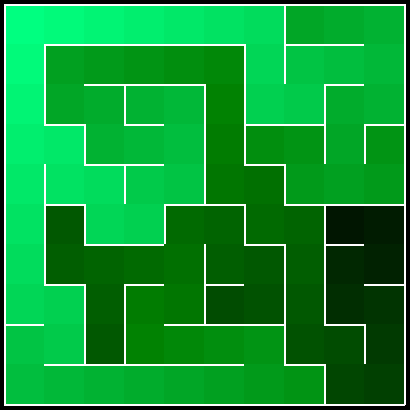

In [4]:
maze = Maze(10, 10)
RecursiveBacktracer(maze)
maze.add_colors(color=(0, 256, 128))
display(maze.draw(cell_width=40))

## Basic analysis
### Time Complexity : O(N<sup>2</sup>)
In this algorithm we traverse a path until we can't anymore, and then backtrace until we find an unvisited neighbor. We know that each node has atmost 4 neighbors, and that each time the algorithm checks a node it decreases the number of its unvisited neighbors by 4. Therefore we can be assured that the algorithm will check each node atmost 4 times. Therefore the algorithm is linear in terms of the number of nodes(N is the upper bound on rows/columns).
### Additional Space : O(N<sup>2</sup>)
For the algorithm to work, we need to check if the nodes are visited. To do this we need to maintain atleast a bit of information per node. As there are N<sup>2</sup> nodes, we need N<sup>2</sup> additional space. We also need a stack that can grow to atmost N<sup>2</sup> size (worst case).
### Bias
There is no evident bias, further checks will have to be done. (Tools for bias analysis haven't been confirmed yet)